In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.stem import PorterStemmer
import re 
sns.set()

In [2]:
data=pd.read_csv('/content/train.csv')

In [3]:
data_test=pd.read_csv('/content/test.csv')

In [4]:
data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [5]:
data.duplicated().sum()

0

In [6]:
data.isnull().sum()* 100 / len(data)

id           0.000000
keyword      0.801261
location    33.272035
text         0.000000
target       0.000000
dtype: float64

<Figure size 720x432 with 0 Axes>

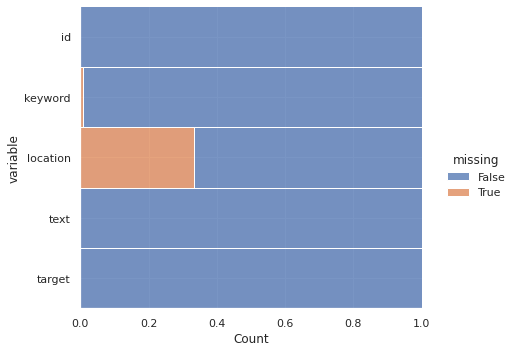

In [7]:
plt.figure(figsize=(10,6))
sns.displot(
    data=data.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)

In [8]:
data['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [9]:
data['location'].value_counts()[:15]

USA                104
New York            71
United States       50
London              45
Canada              29
Nigeria             28
UK                  27
Los Angeles, CA     26
India               24
Mumbai              22
Washington, DC      21
Kenya               20
Worldwide           19
Australia           18
Chicago, IL         18
Name: location, dtype: int64

In [10]:
data['keyword'].value_counts()[:15]

fatalities     45
deluge         42
armageddon     42
sinking        41
damage         41
harm           41
body%20bags    41
outbreak       40
evacuate       40
fear           40
collided       40
siren          40
twister        40
windstorm      40
sinkhole       39
Name: keyword, dtype: int64

SyntaxError: ignored

In [208]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words=stopwords.words('english')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
def process_tweets(tweets):
    clean_tweets=[]
    stemmer=PorterStemmer()

    for tweet in tweets:
        #clean tweet
        tweet=re.sub(r'(@|#)[a-zA-Z0-9_]+',"",tweet)# remove hash $ mention
        tweet=re.sub(r'https?:\/\/\S+',"",tweet) # remove hyperlink
        tweet=re.sub(r'\W'," ",tweet) # remove special chacters 
        tweet=re.sub(r'\s[0-9]+\s'," ",tweet) # remove numbers
        tweet=re.sub('^\s+',"",tweet) # remove spaces
        tweet=re.sub('\s+$',"",tweet) # remove spaces

        # remove stops words and stemming 
        clean_tweet=[stemmer.stem(word.lower()) for word in tweet.split() if word.lower() not in stop_words]

        clean_tweets.append(clean_tweet)

    return clean_tweets

In [29]:
clean_data=process_tweets(data['text'])

In [180]:
def build_freq(tweets):
    freq={}

    for i in range(len(tweets)):

        for word in tweets[i]:
            key=word

            if key not in freq.keys():

                
                    freq[key]=[1]

            else:
              freq[key][0]+=1

                
                    
    return freq

In [181]:
freq_dict=build_freq(clean_data)

In [199]:
common_words=pd.value_counts((freq_dict))
common_words.value_counts

<bound method IndexOpsMixin.value_counts of {'deed': [2], 'reason': [31], 'may': [88], 'allah': [4], 'forgiv': [3], 'us': [117], 'forest': [64], 'fire': [358], 'near': [57], 'la': [24], 'rong': [1], 'sask': [1], 'canada': [11], 'resid': [9], 'ask': [28], 'shelter': [7], 'place': [35], 'notifi': [1], 'offic': [53], 'evacu': [129], 'order': [41], 'expect': [33], '13': [9], 'peopl': [199], 'receiv': [4], 'california': [116], 'got': [113], 'sent': [13], 'photo': [64], 'rubi': [1], 'smoke': [54], 'pour': [4], 'school': [70], 'updat': [56], 'hwi': [10], 'close': [40], 'direct': [18], 'due': [31], 'lake': [15], 'counti': [38], 'heavi': [19], 'rain': [56], 'caus': [106], 'flash': [21], 'flood': [158], 'street': [32], 'manit': [1], 'colorado': [14], 'spring': [18], 'area': [59], 'top': [57], 'hill': [12], 'see': [128], 'wood': [6], 'emerg': [159], 'happen': [56], 'build': [153], 'across': [20], 'afraid': [5], 'tornado': [40], 'come': [125], 'three': [31], 'die': [82], 'heat': [48], 'wave': [75]

In [14]:
test=process_tweets(data_test['text'])

In [66]:
new=np.array(clean_data)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


In [67]:
new.shape

(7613,)

In [68]:
from tensorflow.keras.preprocessing.text import Tokenizer
toknizer=Tokenizer()
toknizer.fit_on_texts(new)
sequence=toknizer.texts_to_sequences(new)

In [69]:
from tensorflow.keras.preprocessing.text import Tokenizer
toknizer=Tokenizer()
toknizer.fit_on_texts(test)
sequence_test=toknizer.texts_to_sequences(test)

In [70]:
sequence_test=np.array(sequence_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


In [71]:
sequence_test.shape

(3263,)

In [72]:
len_seq=[len(sent) for sent in sequence]
max(len_seq)

23

In [73]:
len_seq=[len(sent) for sent in sequence_test]
max(len_seq)

23

In [74]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

padd_sequnces=pad_sequences(sequence,maxlen=24)

In [75]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

padd_sequnces_test=pad_sequences(sequence_test,maxlen=24)

In [76]:
padd_sequnces.shape[1]

24

In [168]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Embedding,Dropout,SpatialDropout1D


model=Sequential()
model.add(Embedding(3500,350,input_length=padd_sequnces.shape[1]))
model.add(SpatialDropout1D(0.6))
model.add(LSTM(4))
model.add(Dropout(0.6))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_19 (Embedding)    (None, 24, 350)           1225000   
                                                                 
 spatial_dropout1d_19 (Spati  (None, 24, 350)          0         
 alDropout1D)                                                    
                                                                 
 lstm_19 (LSTM)              (None, 4)                 5680      
                                                                 
 dropout_19 (Dropout)        (None, 4)                 0         
                                                                 
 dense_19 (Dense)            (None, 1)                 5         
                                                                 
Total params: 1,230,685
Trainable params: 1,230,685
Non-trainable params: 0
___________________________________________

In [170]:
from sklearn.model_selection import train_test_split

train_X,test_X,train_y,test_y = train_test_split(padd_sequnces,np.array(data.iloc[:,-1]),test_size=0.10)

In [171]:
history=model.fit(train_X,train_y,batch_size=32,epochs=5,validation_split=0.15)

Epoch 1/5
182/182 [==============================] - 2s 9ms/step - loss: 0.6279 - accuracy: 0.6643 - val_loss: 0.5578 - val_accuracy: 0.7519
Epoch 2/5
182/182 [==============================] - 1s 7ms/step - loss: 0.5089 - accuracy: 0.7805 - val_loss: 0.5058 - val_accuracy: 0.7656
Epoch 3/5
182/182 [==============================] - 1s 7ms/step - loss: 0.4499 - accuracy: 0.7967 - val_loss: 0.5068 - val_accuracy: 0.7568
Epoch 4/5
182/182 [==============================] - 1s 7ms/step - loss: 0.4044 - accuracy: 0.8357 - val_loss: 0.5295 - val_accuracy: 0.7490
Epoch 5/5
182/182 [==============================] - 1s 7ms/step - loss: 0.3621 - accuracy: 0.8542 - val_loss: 0.5494 - val_accuracy: 0.7529


Text(0.5, 0, 'epochs')

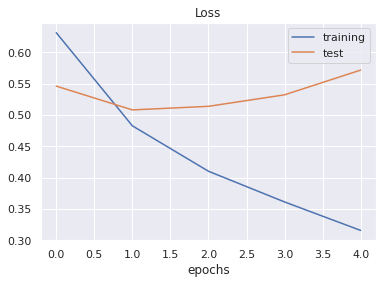

In [162]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','test'])
plt.title('Loss')
plt.xlabel('epochs')

In [172]:
model.evaluate(test_X,test_y)

24/24 [==============================] - 0s 3ms/step - loss: 0.4725 - accuracy: 0.7848


[0.47245103120803833, 0.7847769260406494]

In [173]:
x=model.predict(np.array(padd_sequnces_test))

In [176]:
x[15]

array([0.6866743], dtype=float32)

In [177]:
model.save('model.h4')

INFO:tensorflow:Assets written to: model.h4/assets


INFO:tensorflow:Assets written to: model.h4/assets
